<a href="https://colab.research.google.com/github/MichelAsselin/data-analysis-portfolio/blob/main/Superstore_Sales_%26_Profit_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Portfolio: Analysis of Superstore dataset

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Advanced Data Visualization
print("Setup Complete")

Setup Complete


Time-series analysis (Order Date)

Profitability breakdowns (Sales, Profit, Discount)

Regional analysis (Region, State, City)

Customer segmentation (Segment)

Product performance (Category, Sub-Category)

In [6]:
store_filepath = '/content/Sample - Superstore.csv'

In [7]:
import chardet

with open(store_filepath, "rb") as f:
    print(chardet.detect(f.read(10000)))

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [8]:
df = pd.read_csv(store_filepath, encoding="ISO-8859-1",
                 parse_dates=["Order Date", "Ship Date"]).set_index("Row ID")

# Dataset source & citation
This dataset comes from Tableau and was submitted on Kaggle by X.

# Business context
This project analyzes the sales and profitability performance of a retail company across categories, regions, and customer segments. The goal is to identify key factors driving profit and provide recommendations to improve pricing, discount, and shipping strategies.

# Additional Columns

In [9]:
df["Profit Margin"] = (df["Profit"] * 100) / df["Sales"]
df["Delivery Time"] = (df["Ship Date"] - df["Order Date"]).dt.days

We added a column named "Profit Margin" to calculate the financial ratio of profit earned in relation to its revenue. We also added a column called "Delivery Time" to know how long it takes for a delivery to be done.

# Data Understanding & Cleaning

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, 1 to 9994
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Product Name   9994 non-nu

In [11]:
df.describe()

,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Profit Margin,Delivery Time
count,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896,12.031393,3.958175
min,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,-275.000000,0.000000
25%,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750,7.500000,3.000000
50%,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500,27.000000,4.000000
75%,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000,36.250000,5.000000
max,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000,50.000000,7.000000
std,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108,46.675435,1.747567


In [12]:
df.isna().sum()

,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0
State,0


In [13]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit Margin,Delivery Time
Row ID,,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,16.00,3
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,30.00,3
3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,47.00,4
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,-40.00,7
5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11.25,7


This data shows us that there are no missing values.

### Duplicates

In [14]:
df.duplicated()

,0
Row ID,
1,False
2,False
3,False
4,False
5,False
...,...
9990,False
9991,False
9992,False


There are no duplicate rows in the dataset. Nonetheless, we find duplicates of Order ID. But the study of the data shows us that one Order ID encompasses multiple goods, which is shown through multiple rows with the same Order ID.

# KPIs and Summary Metrics

In [15]:
Total_Sales = df["Sales"].sum()
Total_Profit = df["Profit"].sum()
Average_Discount = df["Discount"].mean()
Average_Delivery_Days = df["Delivery Time"].mean()
Average_Profit_Margin = df["Profit Margin"].mean()

print(f"Total Sales: ${Total_Sales:,.0f}")
print(f"Total Profit: ${Total_Profit:,.0f}")
print(f"Average Discount: {Average_Discount:,.2f}%")
print(f"Average Delivery Days: {Average_Delivery_Days:,.1f} days")
print(f"Average Profit Margin: {Average_Profit_Margin:,.2f}%")

Total Sales: $2,297,201
Total Profit: $286,397
Average Discount: 0.16%
Average Delivery Days: 4.0 days
Average Profit Margin: 12.03%


In [16]:
Discount_Categories = df.groupby("Category")["Discount"].mean()
Discount_Categories

,Discount
Category,
Furniture,0.173923
Office Supplies,0.157285
Technology,0.132323


In [17]:
Tech_Discount_Avg = df.loc[df["Category"] == "Technology", "Discount"].mean()
Furniture_Discount_Avg = df.loc[df["Category"] == "Furniture", "Discount"].mean()
Office_Discount_Avg = df.loc[df["Category"] == "Office Supplies", "Discount"].mean()

print(f"Average Technology Discount: {Tech_Discount_Avg:,.2f}%")
print(f"Average Furniture Discount: {Furniture_Discount_Avg:,.2f}%")
print(f"Average Office Supplies Discount: {Office_Discount_Avg:,.2f}%")

Average Technology Discount: 0.13%
Average Furniture Discount: 0.17%
Average Office Supplies Discount: 0.16%


In [18]:
for cat in df["Sub-Category"].unique():
    avg = df.loc[df["Sub-Category"] == cat, "Discount"].mean()
    print(f"{cat} Average Discount: {avg:,.2f}%")

Bookcases Average Discount: 0.21%
Chairs Average Discount: 0.17%
Labels Average Discount: 0.07%
Tables Average Discount: 0.26%
Storage Average Discount: 0.07%
Furnishings Average Discount: 0.14%
Art Average Discount: 0.07%
Phones Average Discount: 0.15%
Binders Average Discount: 0.37%
Appliances Average Discount: 0.17%
Paper Average Discount: 0.07%
Accessories Average Discount: 0.08%
Envelopes Average Discount: 0.08%
Fasteners Average Discount: 0.08%
Supplies Average Discount: 0.08%
Machines Average Discount: 0.31%
Copiers Average Discount: 0.16%


# Heatmap to see relationship between variables

In [19]:
sns.set_theme(context='notebook', style = "whitegrid", palette= "colorblind")

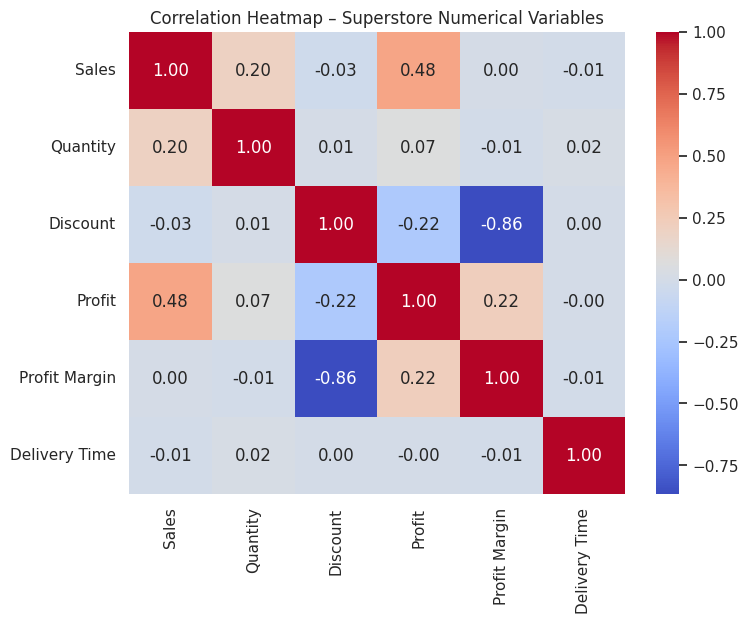

In [20]:
num_cols = ["Sales", "Quantity", "Discount", "Profit", "Profit Margin", "Delivery Time"]
corr = df[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap – Superstore Numerical Variables")
plt.show()


The correlation heatmap shows us the relationships between variables. We see a strong negative relationship between Profit Margin and Discount with a negative correlation coefficient of -0.86. There is also a weak negative relationship with a lower negative coefficient of -.22 between Profit and Discount. Then, we  notice a weak positive relationship between Quantity and Sales with a 0.2 correlation coefficient. Finally, there is a relatively weak positive relationship between Profit and Sales with a 0.48 correlation coefficient. Thus, from that we learn that the more discounts there are, the lower the profit margin is. Also, sales are not the main driver for profit due to their weak positie relationship.

## How have total sales and profit evolved over time?

In [21]:
sales_monthly = df.resample('M', on='Order Date')['Sales'].sum()
profit_monthly = df.resample('M', on='Order Date')['Profit'].sum()

/tmp/ipython-input-2076783032.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales_monthly = df.resample('M', on='Order Date')['Sales'].sum()
/tmp/ipython-input-2076783032.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  profit_monthly = df.resample('M', on='Order Date')['Profit'].sum()


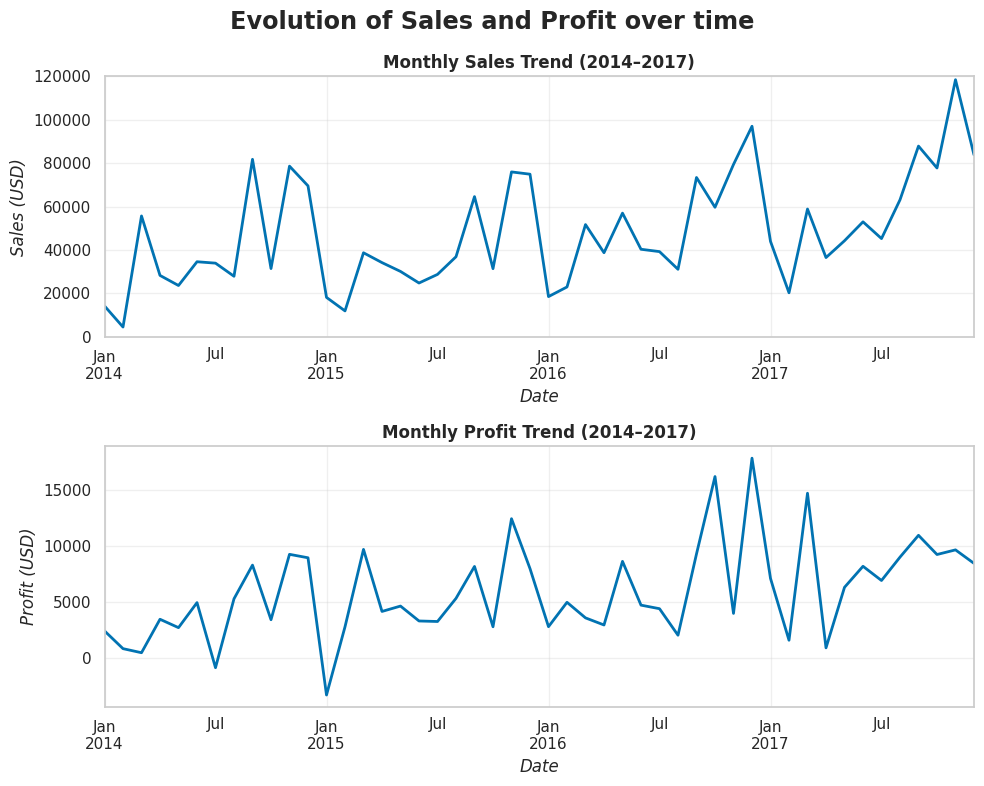

In [22]:
fig, ax = plt.subplots(2,1, figsize = (10, 8))
sales_monthly.plot(linewidth=2, ax = ax[0])
ax[0].set_title("Monthly Sales Trend (2014–2017)", fontweight = "bold")
ax[0].set_ylabel("Sales (USD)", fontsize = 12, style= "italic")
ax[0].set_xlabel("Date", fontsize = 12, style= "italic")
ax[0].set_ylim(0, 120000)
ax[0].grid(True, alpha=0.3)

profit_monthly.plot(linewidth=2, ax = ax[1])
ax[1].set_title("Monthly Profit Trend (2014–2017)", fontweight = "bold")
ax[1].set_ylabel("Profit (USD)", fontsize = 12, style= "italic")
ax[1].set_xlabel("Date", fontsize = 12, style= "italic")
ax[1].grid(True, alpha=0.3)

plt.suptitle("Evolution of Sales and Profit over time",
             size = "x-large", fontweight = "bold")
plt.grid(True, alpha=0.3)
plt.tight_layout()

## 1. Which product categories drive the most revenue and profit?

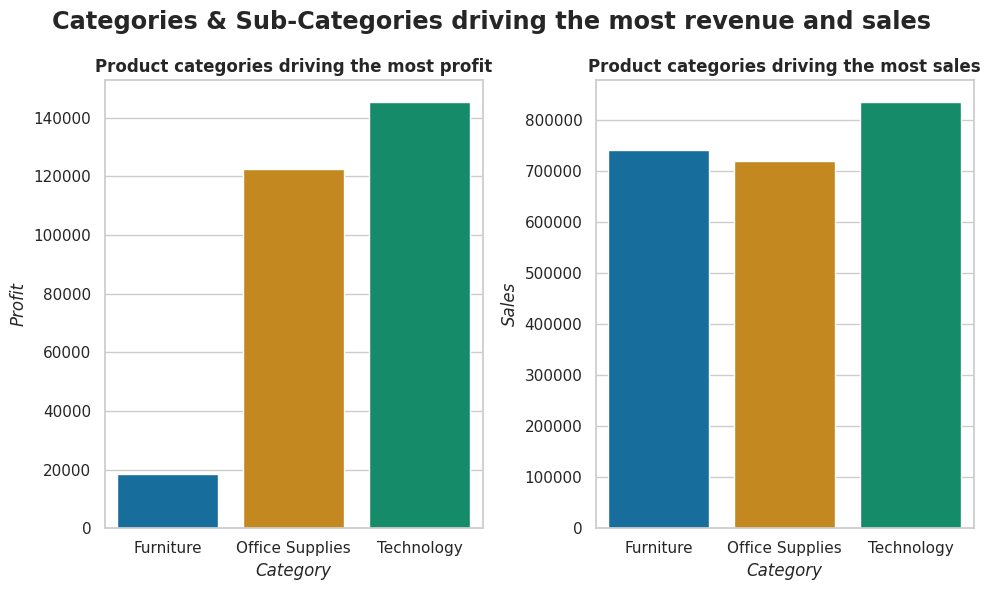

In [23]:
fig, ax = plt.subplots(1,2, figsize = (10, 6))
sns.barplot(x = df["Category"], y = df["Profit"],
            estimator = sum, ax = ax[0], hue = df["Category"],
            errorbar= None) #Cat & Pro
ax[0].set_title("Product categories driving the most profit", fontweight = "bold")
ax[0].set_xlabel("Category", fontsize = 12, style= "italic")
ax[0].set_ylabel("Profit", fontsize = 12, style = "italic")

sns.barplot(x = df["Category"], y = df["Sales"],
            estimator = sum, ax = ax[1], hue = df["Category"],
            errorbar = None) #Cat & Sales
ax[1].set_title("Product categories driving the most sales", fontweight = "bold")
ax[1].set_xlabel("Category", fontsize = 12, style= "italic")
ax[1].set_ylabel("Sales", fontsize = 12, style = "italic")

plt.suptitle("Categories & Sub-Categories driving the most revenue and sales",
             size = "x-large", fontweight = "bold")
plt.tight_layout()

### Insight
Technology drives the highest sales and profit at Superstore with more than 800,000 sales and 150,000 in profit. Furniture is the second category with the highest sales with more than 700,000 in sales, but it is the least profitable of the three with less than 25,000 in profits.

In [24]:
def subcategory_sales(subcategory):
    return df.loc[df["Sub-Category"] == subcategory, "Sales"].sum()

In [25]:
subcategory_sales("Phones")

np.float64(330007.054)

## 2 Which sub-categories are most profitable within each product category?

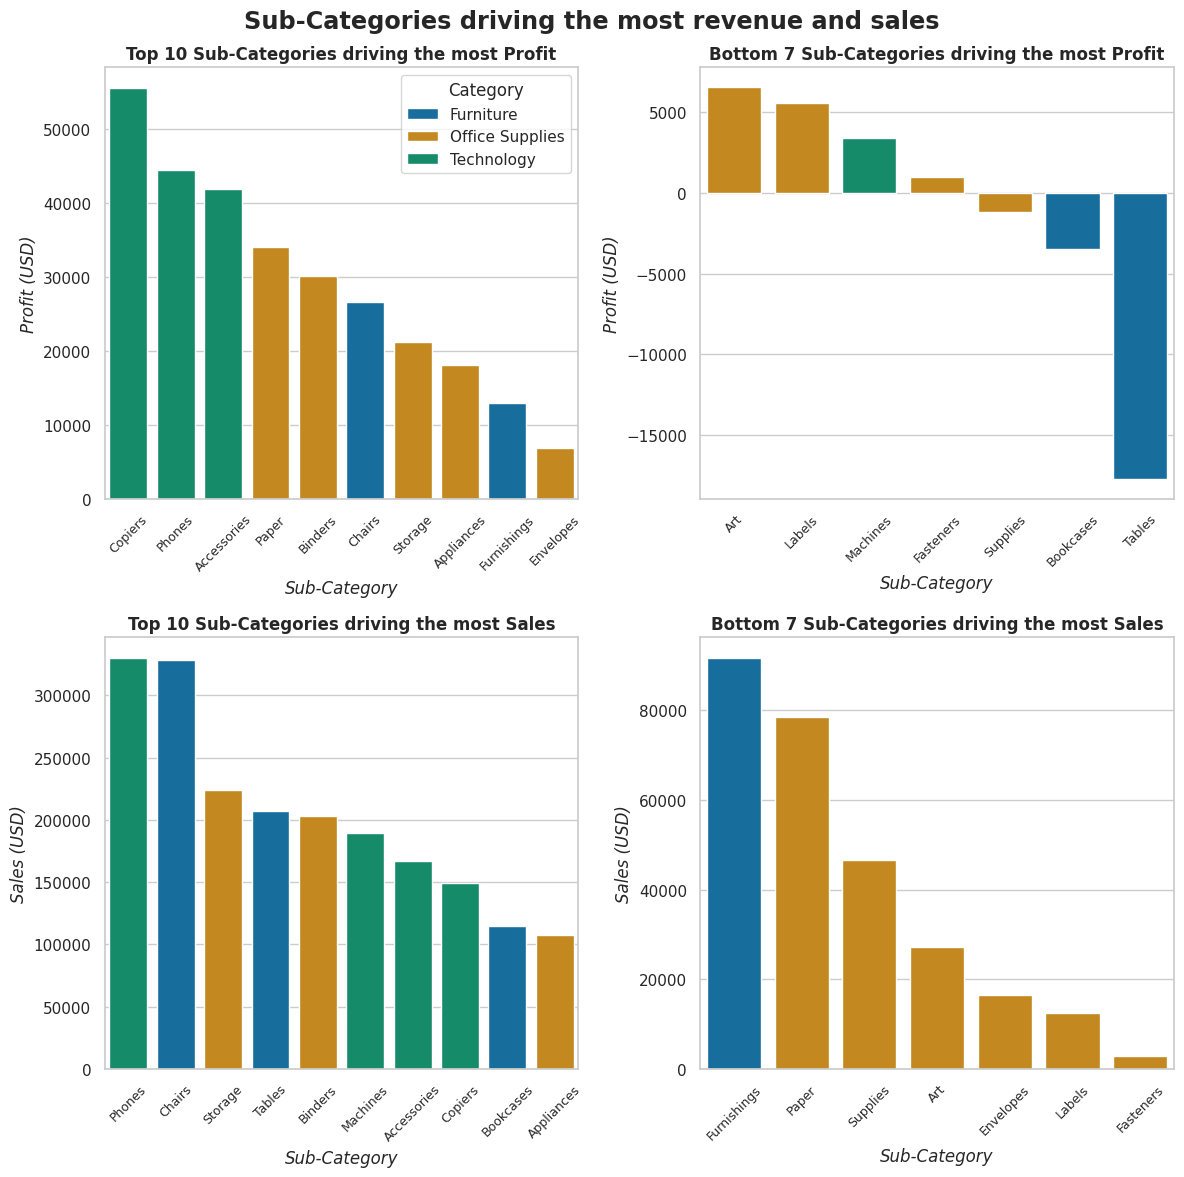

In [26]:
fig, ax = plt.subplots(2,2, figsize = (12, 12))

order1 = (df.groupby("Sub-Category")['Profit'].sum().sort_values(ascending = False).head(10).index)
sns.barplot(x = df["Sub-Category"], y = df["Profit"],
            hue = df['Category'], estimator = sum, dodge=False, ax = ax[0,0],
            order = order1, errorbar = None) #Pro & Sub

ax[0,0].set_title("Top 10 Sub-Categories driving the most Profit", fontweight = "bold")
ax[0,0].set_xlabel("Sub-Category", fontsize = 12, style= "italic")
ax[0,0].set_ylabel("Profit (USD)", fontsize = 12, style= "italic")
ax[0,0].tick_params('x', labelrotation=45, labelsize=9)

order1_5 = (df.groupby("Sub-Category")['Profit'].sum().sort_values(ascending = False).tail(7).index)
sns.barplot(x = df["Sub-Category"], y = df["Profit"],
            hue = df['Category'], estimator = sum, dodge=False, ax = ax[0,1],
            order = order1_5, errorbar = None) #Pro & Sub

ax[0,1].set_title("Bottom 7 Sub-Categories driving the most Profit", fontweight = "bold")
ax[0,1].set_xlabel("Sub-Category", fontsize = 12, style= "italic")
ax[0,1].set_ylabel("Profit (USD)", fontsize = 12, style= "italic")
ax[0,1].tick_params('x', labelrotation=45, labelsize=9)

order2 = (df.groupby("Sub-Category")['Sales'].sum().sort_values(ascending = False).head(10).index)
sns.barplot(x = df["Sub-Category"], y = df["Sales"],
            hue = df['Category'], estimator = sum, dodge=False, ax = ax[1,0],
            order = order2, errorbar = None) # Sales & Cat

ax[1,0].set_title("Top 10 Sub-Categories driving the most Sales", fontweight = "bold")
ax[1,0].set_xlabel("Sub-Category", fontsize = 12, style= "italic")
ax[1,0].set_ylabel("Sales (USD)", fontsize = 12, style= "italic")
ax[1,0].tick_params('x', labelrotation=45, labelsize=9)

order2_5 = (df.groupby("Sub-Category")['Sales'].sum().sort_values(ascending = False).tail(7).index)
sns.barplot(x = df["Sub-Category"], y = df["Sales"],
            hue = df['Category'], estimator = sum, dodge=False, ax = ax[1,1],
            order = order2_5, errorbar = None) # Sales & Cat

ax[1,1].set_title("Bottom 7 Sub-Categories driving the most Sales", fontweight = "bold")
ax[1,1].set_xlabel("Sub-Category", fontsize = 12, style= "italic")
ax[1,1].set_ylabel("Sales (USD)", fontsize = 12, style= "italic")
ax[1,1].tick_params('x', labelrotation=45, labelsize=9)

ax[0,1].legend_.remove()
ax[1,0].legend_.remove()
ax[1,1].legend_.remove()

plt.suptitle("Sub-Categories driving the most revenue and sales",
             fontweight = "bold", size = "x-large")
plt.tight_layout()

## 3. Do discounts hurt profitability?

In [27]:
import matplotlib.ticker as mtick

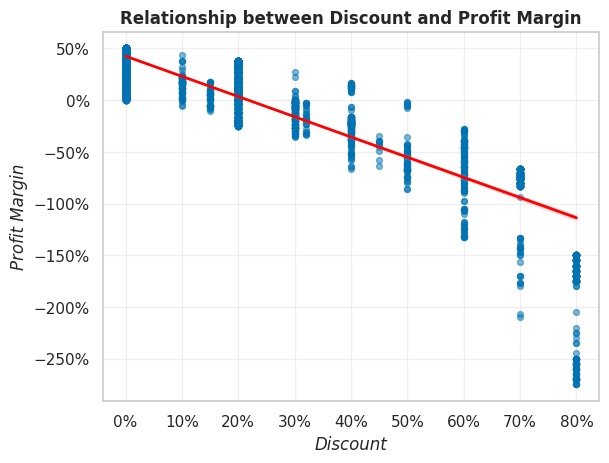

In [28]:
ax = sns.regplot(data = df, x ="Discount", y = "Profit Margin", line_kws = {'color': 'red', 'lw': 2}, scatter_kws={'alpha':0.5, 's':18})
plt.grid(True, alpha=0.3)
plt.title("Relationship between Discount and Profit Margin", fontweight = "bold")
plt.xlabel("Discount", fontsize = 12, style= "italic")
plt.ylabel("Profit Margin", fontsize = 12, style= "italic")
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

The regression line clearly shows that higher discounts are strongly associated with lower profit margins.
Beyond 40–50% discounts, profit margins become largely negative, indicating that excessive discounting directly erodes profitability.

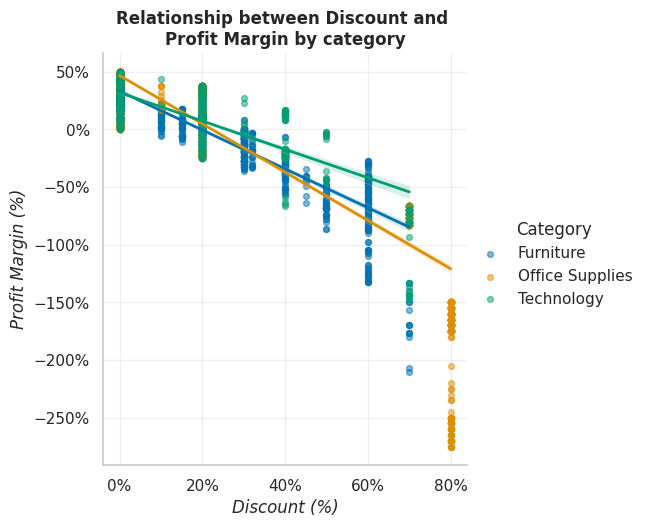

In [29]:
ax = sns.lmplot(data = df, x ="Discount", y = "Profit Margin", hue = "Category",
           line_kws = {'lw': 2}, scatter_kws={'alpha':0.5, 's':18})
plt.grid(True, alpha=0.3)
plt.title("Relationship between Discount and \nProfit Margin by category", fontweight = "bold")
plt.xlabel("Discount (%)", fontsize = 12, style= "italic")
plt.ylabel("Profit Margin (%)", fontsize = 12, style= "italic")

# Iterate over the axes in the FacetGrid and set the formatter for each x-axis
for axis in ax.axes.flat:
    axis.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    axis.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()

While discounts reduce profitability in all product categories, the impact varies: furniture shows the largest margin loss, while technology remains more resilient.

## 4. Which regions are most profitable?

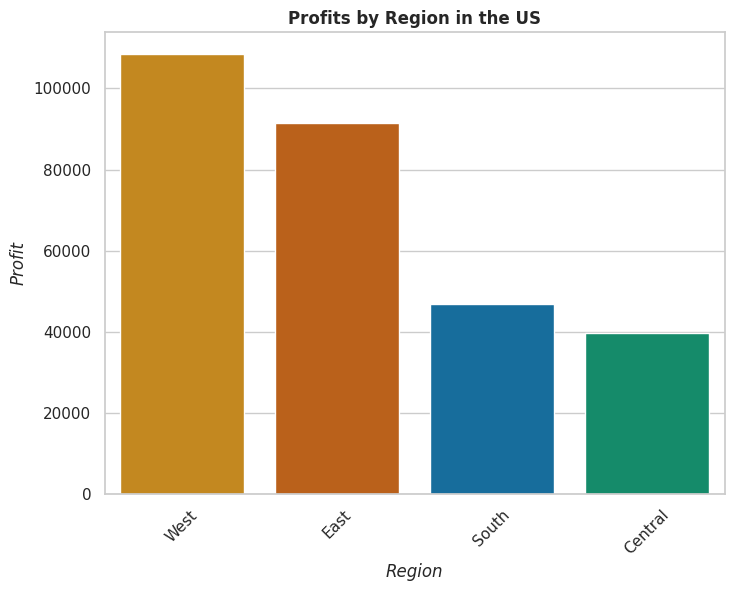

In [54]:
# Regional & State Analysis
order = (df.groupby("Region") # Groups df by unique values of "State"
         ["Profit"]. # select only the "Sales" column for each group
         sum(). # for each state, sum the sales values
         sort_values(ascending = False). # sort series from largest to smallest
         head(25). # Select only first 25 states
         index) # Gets just the index labels (the state names) in the sorted order

plt.figure(figsize = (8, 6))
sns.barplot(x = df["Region"],
            y = df["Profit"],
            estimator = sum,
            order = order,
            errorbar = None,
            dodge = False,
            hue = df["Region"])
plt.xlabel("Region", fontsize = 12, style= "italic")
plt.ylabel("Profit", fontsize = 12, style= "italic")
plt.title("Profits by Region in the US", fontweight = "bold")
plt.xticks(rotation= 45);

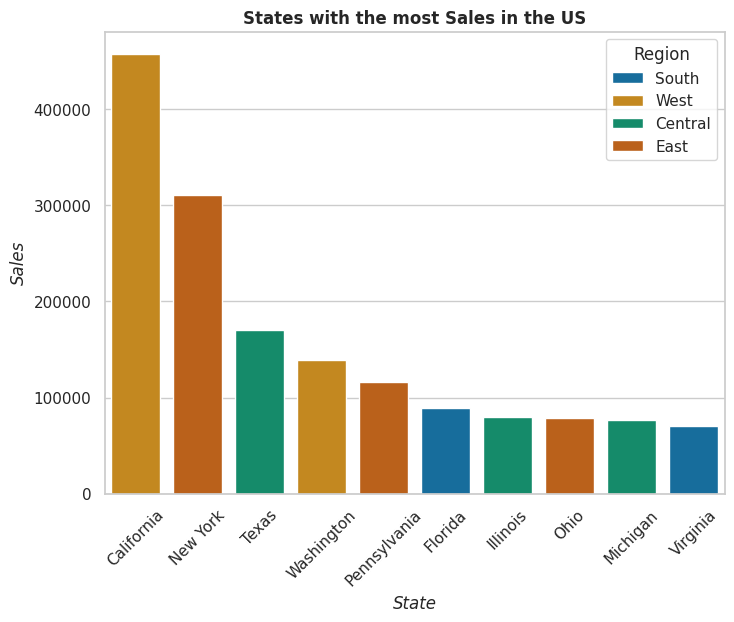

In [58]:
order = (df.groupby("State") # Groups df by unique values of "State"
         ["Sales"]. # select only the "Sales" column for each group
         sum(). # for each state, sum the sales values
         sort_values(ascending = False). # sort series from largest to smallest
         head(10). # Select only first 10 states
         index) # Gets just the index labels (the state names) in the sorted order

plt.figure(figsize = (8, 6))
sns.barplot(x = df["State"],
            y = df["Sales"],
            estimator = sum,
            order = order,
            errorbar = None,
            dodge = False,
           hue = df["Region"])
plt.xlabel("State", fontsize = 12, style= "italic")
plt.ylabel("Sales", fontsize = 12, style= "italic")
plt.title("States with the most Sales in the US", fontweight = "bold")
plt.xticks(rotation= 45);

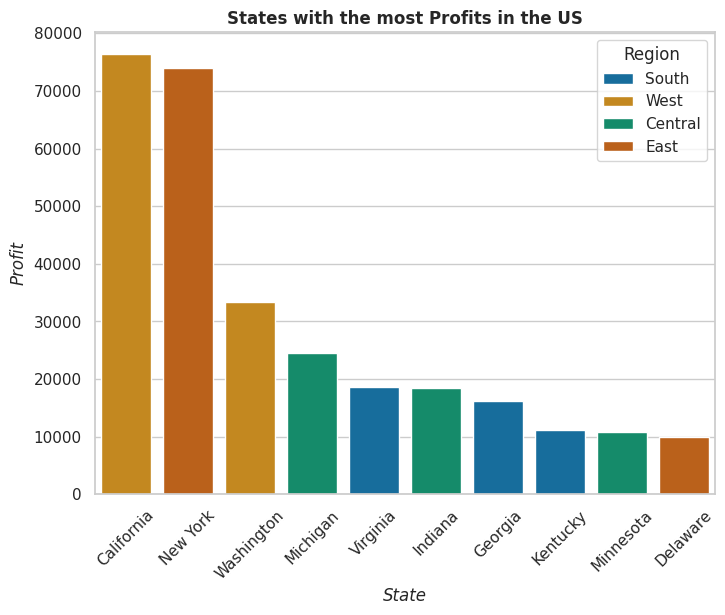

In [57]:
order = (df.groupby("State") # Groups df by unique values of "State"
         ["Profit"]. # select only the "Sales" column for each group
         sum(). # for each state, sum the sales values
         sort_values(ascending = False). # sort series from largest to smallest
         head(10). # Select only first 25 states
         index) # Gets just the index labels (the state names) in the sorted order

plt.figure(figsize = (8, 6))
sns.barplot(x = df["State"],
            y = df["Profit"],
            estimator = sum,
            order = order,
            errorbar = None,
            dodge = False,
           hue = df["Region"])
plt.title("States with the most Profits in the US", fontweight = "bold")
plt.xlabel("State", fontsize = 12, style= "italic")
plt.ylabel("Profit", fontsize = 12, style= "italic")
plt.xticks(rotation= 45);

## 5. Which customer segments are most valuable?

<Axes: xlabel='Segment', ylabel='Profit'>

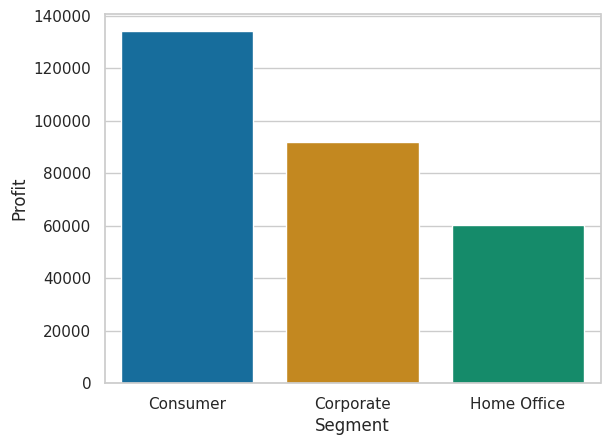

In [33]:
# Segment Analysis
sns.barplot(x = df["Segment"], y = df["Profit"], estimator = sum, hue = df["Segment"], errorbar = None)

## 5. Does shipping mode affect profitability?

<Axes: xlabel='Ship Mode', ylabel='Profit Margin'>

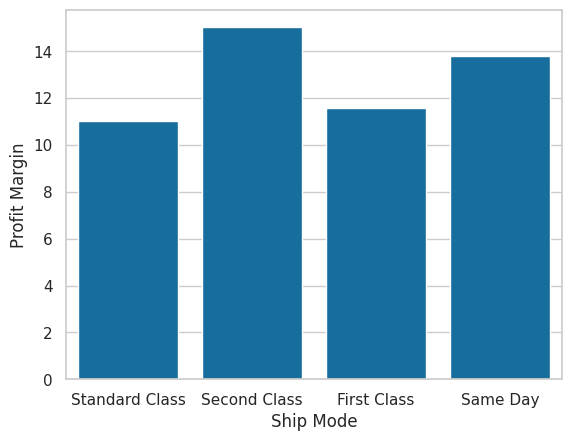

In [34]:
# Shipping Mode
order_shipping = df.groupby("Ship Mode")["Profit Margin"].sum().sort_values(ascending=False).index

sns.barplot(x = df["Ship Mode"], y = df["Profit Margin"], errorbar = None, order = order_shipping)


<Axes: xlabel='Ship Mode', ylabel='Delivery Time'>

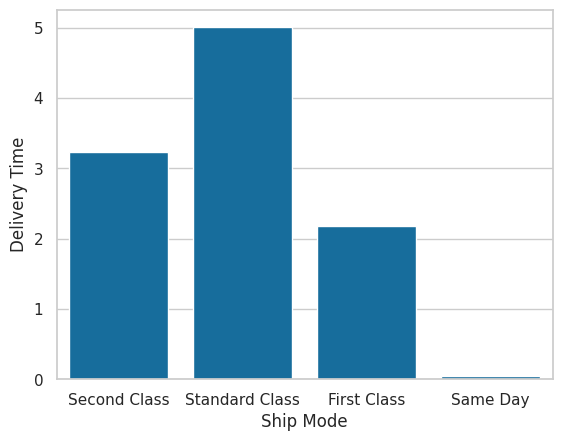

In [35]:
sns.barplot(x = df["Ship Mode"], y = df["Delivery Time"], errorbar = None)

## 6. What’s the relationship between sales volume and profit margin?

(-200.0, 60.0)

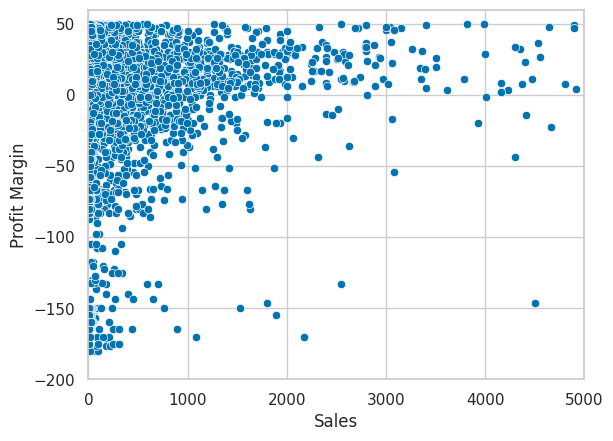

In [36]:
sns.scatterplot(x="Sales", y="Profit Margin", data=df)
plt.xlim(0, 5000)
plt.ylim(-200, 60)

## 7. Are there regional differences in discount usage?

<Axes: xlabel='Region', ylabel='Discount'>

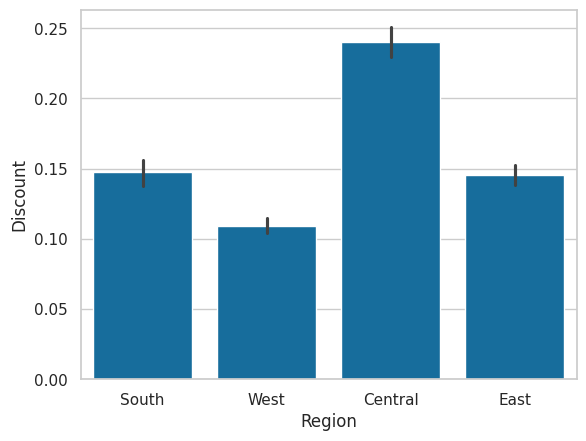

In [37]:
sns.barplot(x="Region", y="Discount", data=df)

## 8. Which states or cities generate the most revenue?

<Axes: xlabel='Sales', ylabel='State'>

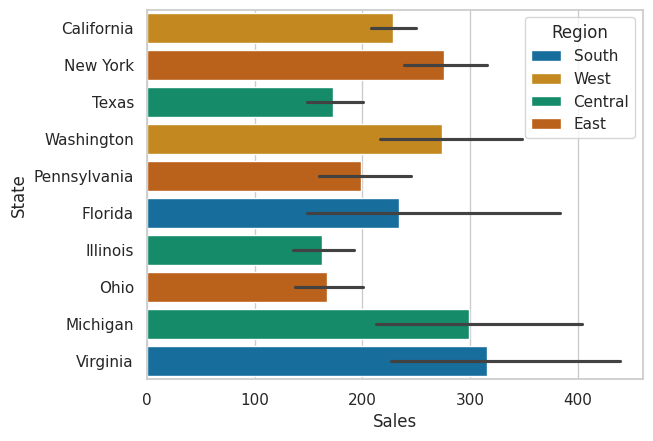

In [38]:
order2 = df.groupby("State")["Sales"].sum().sort_values(ascending=False).head(10).index
sns.barplot(x="Sales", y="State", hue = "Region", data = df, order = order2)

## 9. Which products or sub-categories have the highest average discount?

Plot: Barplot (x=Sub-Category, y=Discount)

Insight: Detects which product types are consistently marked down — may explain profit loss.

<Axes: xlabel='Discount', ylabel='Sub-Category'>

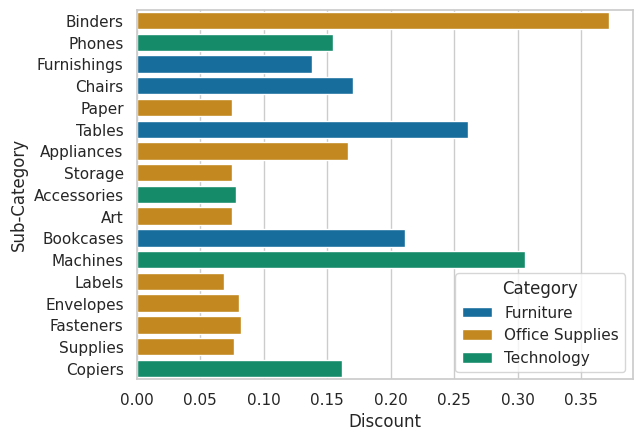

In [39]:
order_discount = df.groupby("Sub-Category")["Discount"].sum().sort_values(ascending = False).index
sns.barplot(x="Discount", y="Sub-Category", data = df, hue = "Category", errorbar = None, order = order_discount)

## 10. Which customer segments order the most items per purchase?

Plot: Barplot of average Quantity per Segment

Insight: Helps understand customer purchasing behavior (e.g., corporate clients buying in bulk).

(0.0, 4.0)

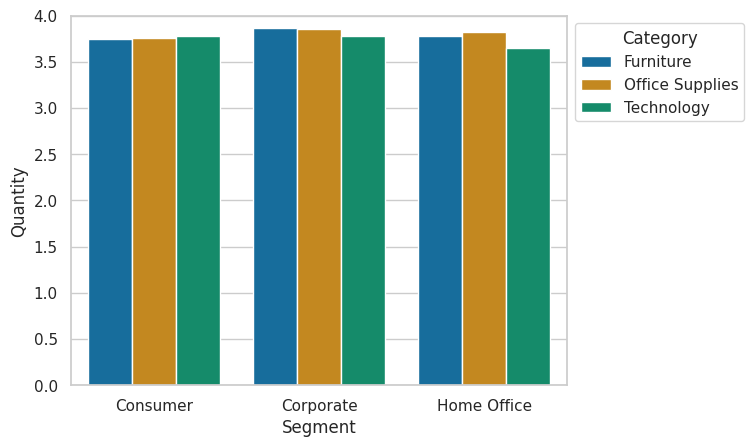

In [40]:
ax = sns.barplot(x = "Segment", y = "Quantity", data = df, estimator = 'mean', hue = "Category", errorbar = None)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0, 4)


# Key Insights & Recommendations
Summarize in a few bullet points what you discovered and what it means for the business.

📍 The West region contributes the highest profit but faces high discount rates.

🚚 Same-Day Shipping is the most profitable mode despite higher cost.

💡 Recommendation: Reduce discounts in Technology category to improve margins.

# Technical Summary
Tools: Python (Pandas, Seaborn, Matplotlib), Power BI
Skills Demonstrated: Data cleaning, grouping, visualization, KPI computation, business storytelling

# 🧭 10️⃣ Optional but Impressive Extras

In [41]:
pd.pivot_table(df,
                values='Profit',
                index='Region',
                columns='Category',
                aggfunc='sum',
                margins=True)

Category,Furniture,Office Supplies,Technology,All
Region,,,,
Central,-2871.0494,8879.9799,33697.4320,39706.3625
East,3046.1658,41014.5791,47462.0351,91522.7800
South,6771.2061,19986.3928,19991.8314,46749.4303
West,11504.9503,52609.8490,44303.6496,108418.4489
All,18451.2728,122490.8008,145454.9481,286397.0217


In [42]:
# Average Profit Margin by Segment and Ship Mode
pd.pivot_table(df,
              values = "Profit Margin",
              index = "Segment",
              columns = "Ship Mode",
              aggfunc="mean",
              margins = True)

Ship Mode,First Class,Same Day,Second Class,Standard Class,All
Segment,,,,,
Consumer,11.215646,13.654135,14.440935,9.880700,11.204952
Corporate,11.431227,14.243143,14.896158,11.238170,12.120261
Home Office,12.900692,13.835172,17.133208,13.862015,14.286959
All,11.594781,13.815135,15.020878,11.007329,12.031393
